# Import

In [2]:
import matplotlib.pyplot as plt
import torch

import classifier_f_test

get_ipython().magic('matplotlib inline')
get_ipython().magic('reload_ext autoreload')
get_ipython().magic('autoreload 2')

True

# Create Test Case

In [3]:
test = classifier_f_test.classifierFTest(use_gpu=True)

# Prepare Dataset

In [12]:
test.create_data_loaders()

# Visualize Dataset

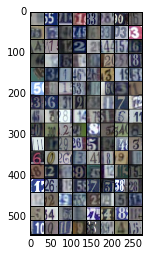

In [5]:
test.visualize_single_batch()

# Create Model

In [13]:
test.create_model()
print(test.model)

F (
  (classify): Sequential (
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU (inplace)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU (inplace)
    (4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2))
    (5): ReLU (inplace)
    (6): Conv2d(256, 128, kernel_size=(2, 2), stride=(1, 1))
    (7): ReLU (inplace)
    (8): Flatten (
    )
    (9): Linear (128 -> 10)
  )
)


# Create Loss Function

In [14]:
test.create_loss_function()

# Create Optimizer

In [15]:
test.create_optimizer()

# Train

In [16]:
kwargs = {}
kwargs["visualize_every_n_epoch"] = 10
test.train_model(num_epochs=40, **kwargs)

[1,  2000] loss: 0.510
[1,  4000] loss: 0.213
[1] loss: 0.161
[2,  2000] loss: 0.164
[2,  4000] loss: 0.147
[2] loss: 0.223
[3,  2000] loss: 0.122
[3,  4000] loss: 0.119
[3] loss: 0.121
[4,  2000] loss: 0.099
[4,  4000] loss: 0.102
[4] loss: 0.070
[5,  2000] loss: 0.085
[5,  4000] loss: 0.088
[5] loss: 0.065
[6,  2000] loss: 0.075
[6,  4000] loss: 0.077
[6] loss: 0.032
[7,  2000] loss: 0.064
[7,  4000] loss: 0.069
[7] loss: 0.062
[8,  2000] loss: 0.058
[8,  4000] loss: 0.061
[8] loss: 0.058
[9,  2000] loss: 0.050
[9,  4000] loss: 0.055
[9] loss: 0.123
[10,  2000] loss: 0.045
[10,  4000] loss: 0.049
[10] loss: 0.026
[11,  2000] loss: 0.039
[11,  4000] loss: 0.045
[11] loss: 0.010
[12,  2000] loss: 0.037
[12,  4000] loss: 0.039
[12] loss: 0.108
[13,  2000] loss: 0.031
[13,  4000] loss: 0.036
[13] loss: 0.004
[14,  2000] loss: 0.028
[14,  4000] loss: 0.032
[14] loss: 0.002
[15,  2000] loss: 0.024
[15,  4000] loss: 0.031
[15] loss: 0.040
[16,  2000] loss: 0.023
[16,  4000] loss: 0.027
[16]

# Save Model

## Checkpoint name

In [23]:
checkpoint_name='checkpoint.tar'

## Save model

In [24]:
torch.save(test.log,checkpoint_name)

## Load model

In [25]:
log=torch.load(checkpoint_name)
model=log['best_model']
test.model = model

# Test Model

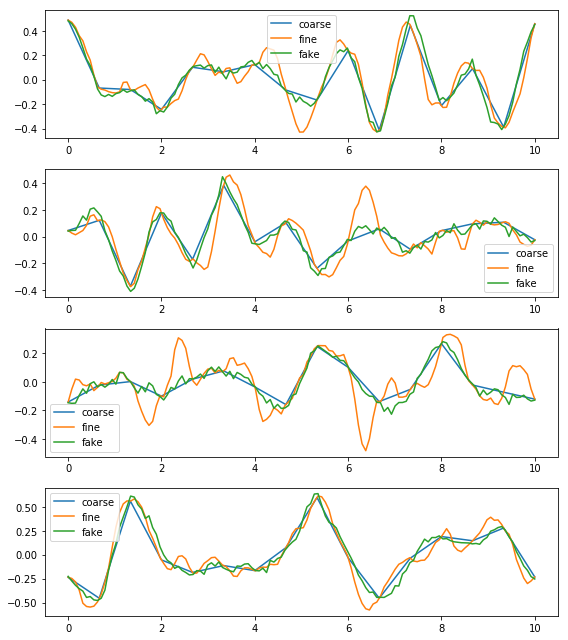

In [26]:
test.test_model()

# Show Loss

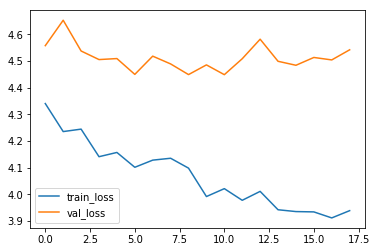

In [27]:
plt.plot(log['train_loss'][2:],label='train_loss')
plt.plot(log['val_loss'][2:],label='val_loss')
plt.legend()
plt.show()